In [1]:
%matplotlib inline

import os, pathlib
from importlib import reload
import logging, warnings
logging.basicConfig(level=logging.ERROR)
warnings.simplefilter("ignore")
import seaborn as sns

import PyPDF2 as ppdf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

import pyaldata as pyal

if "__file__" not in dir():
    try:
        NBPath = pathlib.Path.cwd()
        RepoPath = NBPath.parent
        os.chdir(RepoPath)

        from tools import utilityTools as utility
        from tools import dataTools as dt
        from tools import simTools as st
        import params
        reload(params)
        reload(st)
        monkey_defs = params.monkey_defs
        mouse_defs = params.mouse_defs
        rnn_defs = params.rnn_defs

        set_rc =  params.set_rc_params
        set_rc()
        root = params.root

    finally:
        os.chdir(NBPath)

    # %run "fig2.ipynb"

    print('Done')


FIGPATH = params.figPath / 'figS10-rnn'
if not os.path.exists(FIGPATH):
    os.makedirs(FIGPATH)

Done


In [2]:
seeds1 = rnn_defs.SEEDS1
seeds2 = rnn_defs.SEEDS2
sim1=1
sim2=4

### Fig S13A: RNN rasters and position

In [3]:
@utility.report
def plot_rnn_fr_raster(df,gs):
    trial=rnn_defs.trial_ex
    axes = []
    data = []
    for tar in range(rnn_defs.n_targets):
        df_ = pyal.select_trials(df, df.target_id==tar)
        data.append(df_.MCx_rates[trial])
    data = np.array(data)
    vmin = np.amin(data, axis= (0,1))
    vmax = np.amax(data, axis= (0,1))

    for j,tarData in enumerate(data):
        ax = fig.add_subplot(gs[j])
        axes.append(ax)
        tarData -= vmin
        tarData /= (vmax - vmin)
        ax.imshow(tarData.T, aspect='auto')
        ax.tick_params('both', bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(r'$ \rightarrow $', rotation=(360/monkey_defs.n_targets)*(j-3), pad=0.5)
        axes[0].set_ylabel(f'Units ($n={tarData.shape[1]}$)')
    return axes

@utility.report
def plot_rnn_pos_ex(df,gs):
    trial=rnn_defs.trial_ex
    axes = []
    for tar in range(monkey_defs.n_targets):
        df_ = pyal.select_trials(df, df.target_id==tar)
        data = df_.pos[trial]
        data -= np.mean(data, axis=0, keepdims=True)
        ax = fig.add_subplot(gs[tar])
        axes.append(ax)
        ax.plot(data[:,0], color='b', label='$X$')
        ax.plot(data[:,1], color='r', label='$Y$')
        ax.tick_params('both', bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    
    return axes

Executed: `plot_rnn_fr_raster` in 0.1s
Executed: `plot_rnn_fr_raster` in 0.1s
Executed: `plot_rnn_pos_ex` in 0.1s
Executed: `plot_rnn_pos_ex` in 0.1s


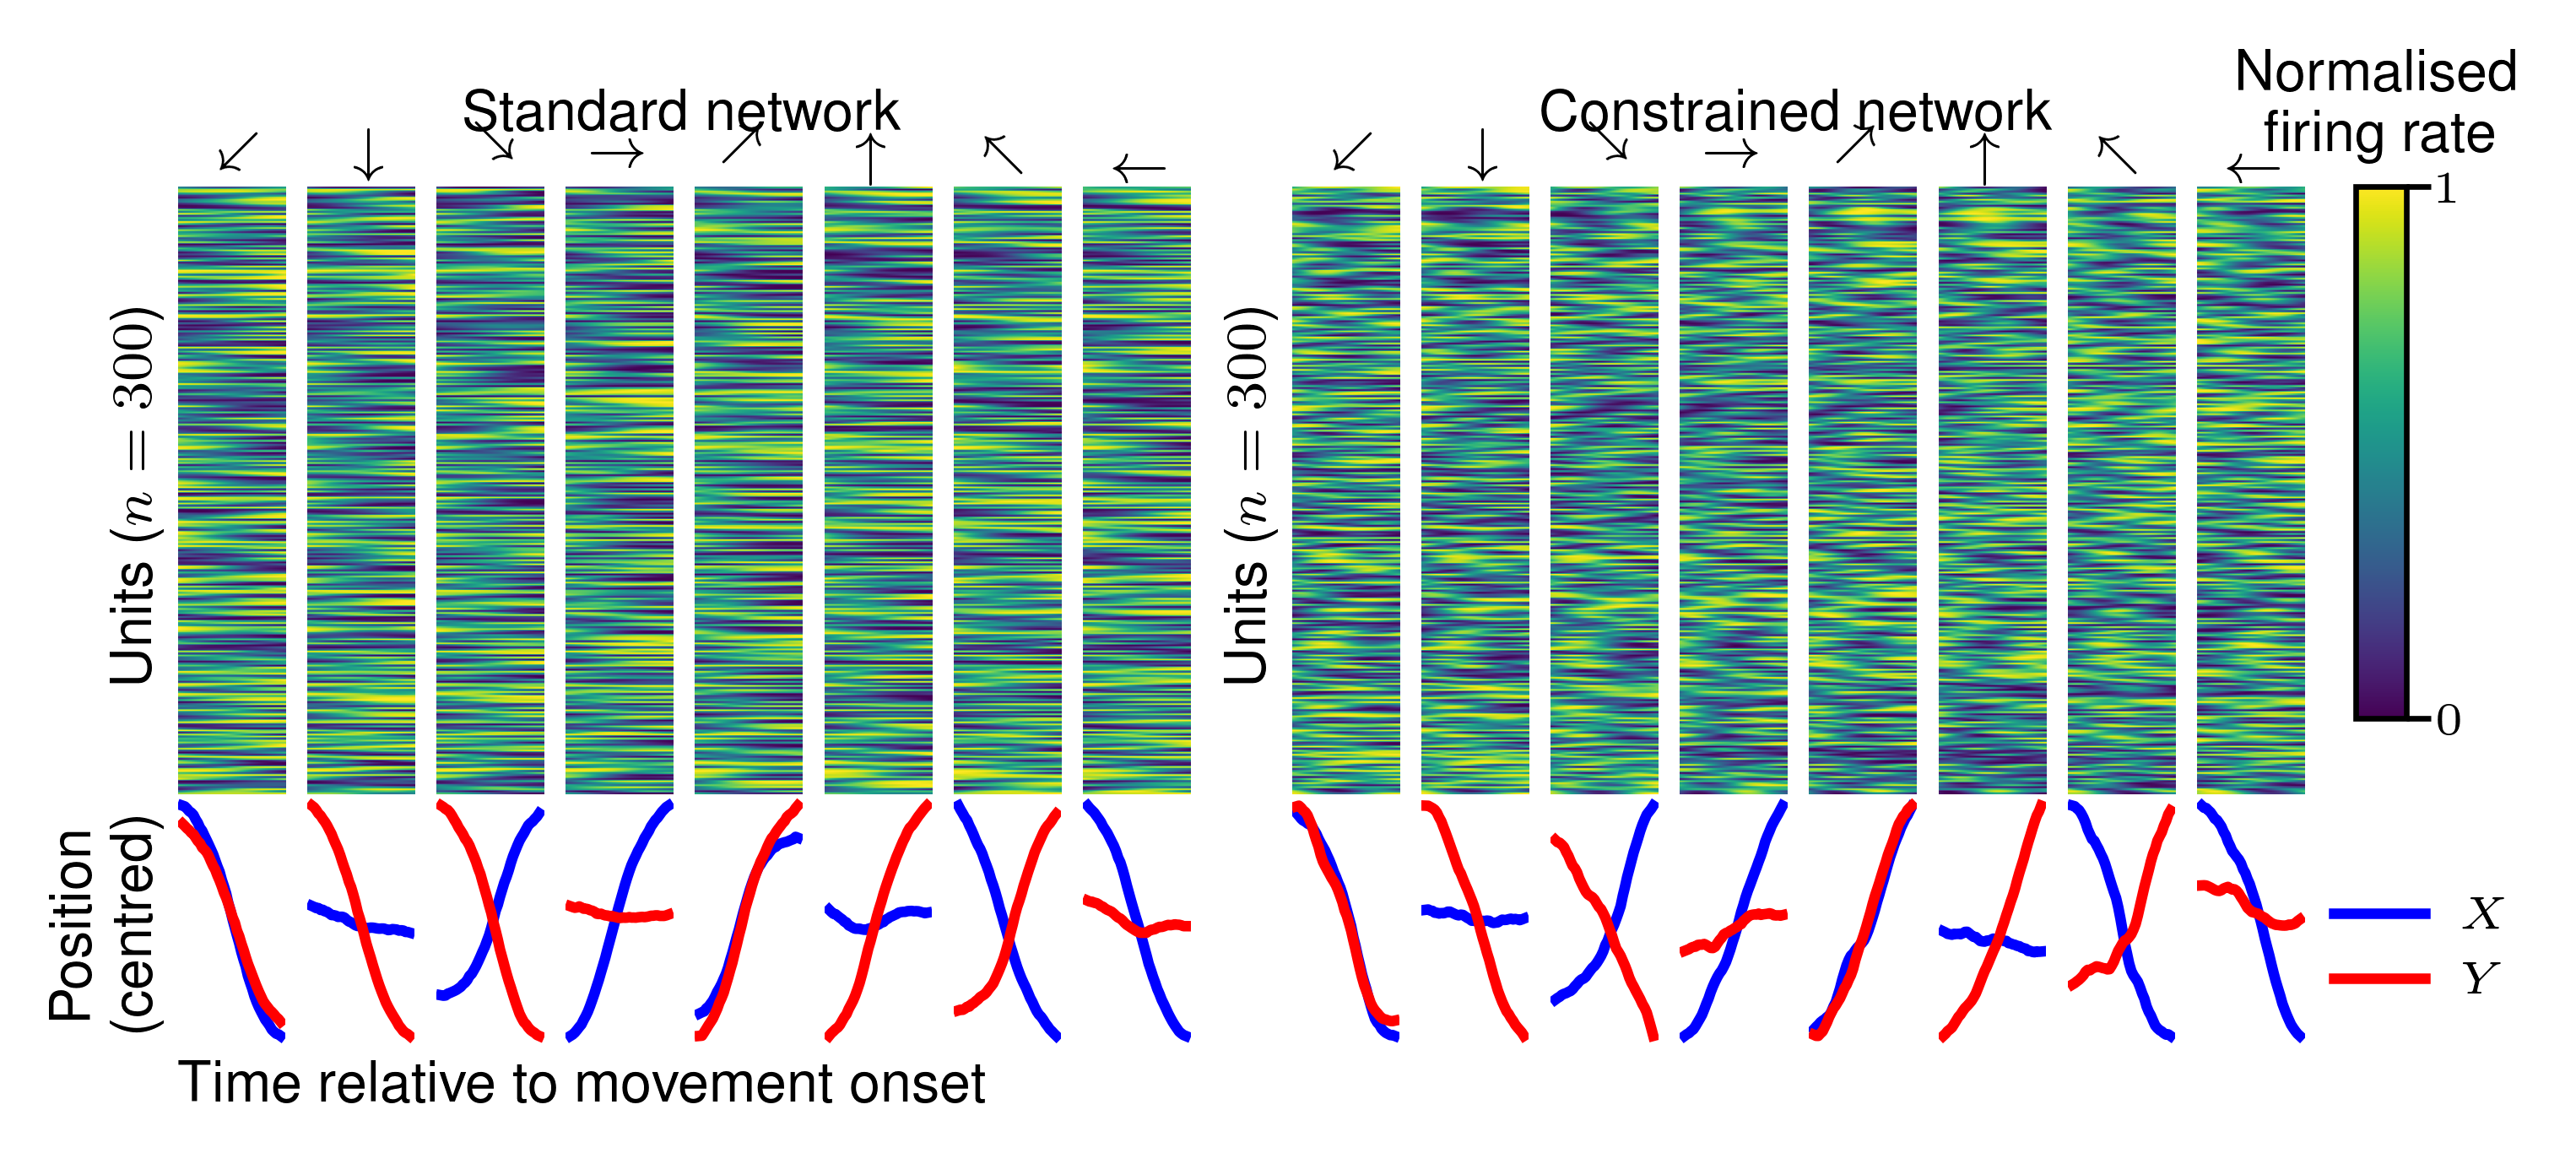

In [4]:
figsize=params.LargeFig
fig=plt.figure(figsize=figsize)

gs5_1 = utility.add_gridspec_abs(fig, nrows=1, ncols=monkey_defs.n_targets,
                                    left=0,
                                    bottom=figsize[1]-params.panels.rnn_raster[1]-0.3,
                                    width=params.panels.rnn_raster[0], 
                                    height=params.panels.rnn_raster[1])
gs5_2 = utility.add_gridspec_abs(fig, nrows=1, ncols=monkey_defs.n_targets,
                                    left=params.panels.rnn_raster[0]+0.2,
                                    bottom=figsize[1]-params.panels.rnn_raster[1]-0.3,
                                    width=params.panels.rnn_raster[0], 
                                    height=params.panels.rnn_raster[1])

gs5_3 = utility.add_gridspec_abs(fig, nrows=1, ncols=monkey_defs.n_targets,
                                    left=0,
                                    bottom=figsize[1]-params.panels.rnn_raster[1]-params.panels.rnn_velocity[1]-0.3,
                                    width=params.panels.rnn_raster[0], 
                                    height=params.panels.rnn_velocity[1])
gs5_4 = utility.add_gridspec_abs(fig, nrows=1, ncols=monkey_defs.n_targets,
                                    left=params.panels.rnn_raster[0]+0.2,
                                    bottom=figsize[1]-params.panels.rnn_raster[1]-params.panels.rnn_velocity[1]-0.3,
                                    width=params.panels.rnn_raster[0], 
                                    height=params.panels.rnn_velocity[1])

df1 = st.get_processed_pyaldata(seeds1[rnn_defs.seed_idx_ex], sim1,
    epoch_fun = rnn_defs.exec_epoch)

df2 = st.get_processed_pyaldata(seeds2[rnn_defs.seed_idx_ex], sim2,
    epoch_fun = rnn_defs.exec_epoch)

raster_example_df = []
raster_example_df.append(df1)
raster_example_df.append(df2)
    
axes5_1 = plot_rnn_fr_raster(raster_example_df[0], gs5_1)
axes5_2 = plot_rnn_fr_raster(raster_example_df[1], gs5_2)
utility.phantom_axes(fig.add_subplot(gs5_1[:])).set_title('Standard network', pad=8)
utility.phantom_axes(fig.add_subplot(gs5_2[:])).set_title('Constrained network', pad=8)

axes5_3 = plot_rnn_pos_ex(raster_example_df[0], gs5_3)
axes5_4 = plot_rnn_pos_ex(raster_example_df[1], gs5_4)

axes5_3[0].set_ylabel('Position\n(centred)')
axes5_3[0].set_xlabel('Time relative to movement onset',loc='left')
X_line = mlines.Line2D([], [], color='blue', label='$X$')
Y_line = mlines.Line2D([], [], color='red', label='$Y$')
axes5_4[-1].legend(handles=[X_line, Y_line], loc=(1.1,.1))
    
gs5_c = utility.add_gridspec_abs(fig, nrows=1, ncols=1, 
                                height=params.panels.rnn_raster[1]-.15, 
                                width=.1, 
                                top=figsize[1]-0.3,
                                right=figsize[0]-params.panels.rnn_cca_hist[0]-0.6,
                                # left=figsize[0] + 0.2, 
                                # bottom=figsize[1]-params.panels.schmatic[1]-params.panels.rnn_raster[1]
                                )
cax5 = fig.add_subplot(gs5_c[:])
fig.colorbar(cm.ScalarMappable(),cax=cax5, ticks=(0,1),drawedges=False)
cax5.set_title('Normalised\nfiring rate')

fig.savefig(FIGPATH / 'RNN-rasters.pdf', bbox_inches='tight')

### Fig S13B: RNN motor output

In [5]:
@utility.report
def plot_rnn_position(ax, seed, sim_number):
    st.graph_sim_position(seed, sim_number, ax = ax)

Executed: `plot_rnn_position` in 0.4s
Executed: `plot_rnn_position` in 0.4s
1000024 1000034


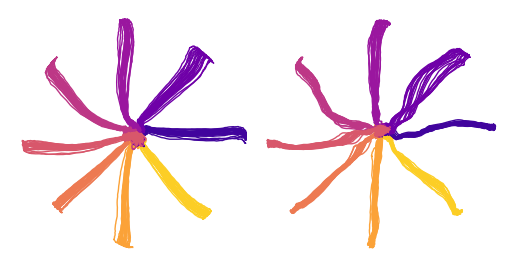

In [6]:
fig=plt.figure(dpi=100)
gs = fig.add_gridspec(wspace=0, nrows = 1, ncols = 2)

ax = fig.add_subplot(gs[0])    
plot_rnn_position(ax, seed=seeds1[rnn_defs.seed_idx_ex], sim_number = sim1)

ax = fig.add_subplot(gs[1])
plot_rnn_position(ax, seed=seeds2[rnn_defs.seed_idx_ex], sim_number = sim2)
print(seeds1[rnn_defs.seed_idx_ex], seeds2[rnn_defs.seed_idx_ex])

fig.savefig(FIGPATH / 'RNN-output.pdf', bbox_inches='tight')

### Fig S13C: RNN behavioral correlation

In [7]:
def get_full_rnn_data(seeds, sim_number):
    dfs = []
    for seed in seeds:
        dfs.append(st.get_processed_pyaldata(seed, sim_number))

    return dfs

In [8]:
@utility.report
def plot_rnn_behav_corr(ax, allDFs_MCx1,allDFs_MCx2):
        
    # across standard and constrained networks
    across_corrs_rnns = st.trim_across_groups_rnn_corr(allDFs_MCx1,allDFs_MCx2)

    CC_corr_rnn=[]
    for i in range(len(allDFs_MCx1)):
        for j in range(len(allDFs_MCx2)):
            behav = np.array(across_corrs_rnns[allDFs_MCx1[i].seed[0]][allDFs_MCx2[j].seed[0]])
            CC_corr_rnn.append(np.mean(behav))

    # across standard or constrained networks
    across_corrs_rnns1 = st.trim_across_rnn_corr(allDFs_MCx1)
    across_corrs_rnns2 = st.trim_across_rnn_corr(allDFs_MCx2)

    CC_corr_rnn_across1=[]
    CC_corr_rnn_across2=[]
    for i in range(len(allDFs_MCx1)):
        for j in range(len(allDFs_MCx1)):
            if j<=i: continue
            CC_corr_rnn_across1.append(np.mean(across_corrs_rnns1[allDFs_MCx1[i].seed[0]][allDFs_MCx1[j].seed[0]]))
    for i in range(len(allDFs_MCx2)):
        for j in range(len(allDFs_MCx2)):
            if j<=i: continue
            CC_corr_rnn_across2.append(np.mean(across_corrs_rnns2[allDFs_MCx2[i].seed[0]][allDFs_MCx2[j].seed[0]]))

    df_across = pd.DataFrame(data = {'corr': CC_corr_rnn, 'group': 'Across'})
    df_across1 = pd.DataFrame(data = {'corr': CC_corr_rnn_across1, 'group': 'Across \n standard'})
    df_across2 = pd.DataFrame(data = {'corr': CC_corr_rnn_across2, 'group': 'Across \n constrained'})
    corr_df = pd.concat([df_across, df_across1, df_across2])

    colors = [params.colors.SimAcrossCC, params.colors.Sim1CC, params.colors.Sim2CC]
    sns.set_palette(sns.color_palette(colors))
    sns.pointplot(data = corr_df, x = 'group', y = 'corr', ax = ax, palette = colors, scale = 0.7, ci='sd') 
    sns.stripplot(data = corr_df, x = 'group', y = 'corr', ax = ax, palette = colors, alpha = 0.3)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel('Behavioural correlation')
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([.75,1.03])

    print(len(CC_corr_rnn), len(CC_corr_rnn_across1), len(CC_corr_rnn_across2))
    
    

100 45 45
Executed: `plot_rnn_behav_corr` in 820.9s


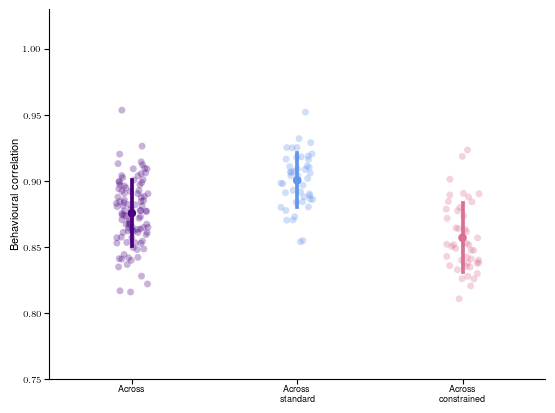

In [9]:
allDFs_rnn1 = get_full_rnn_data(seeds1, sim_number = sim1)
allDFs_rnn2 = get_full_rnn_data(seeds2, sim_number = sim2)

fig=plt.figure(dpi=100)
ax = fig.add_subplot()           

plot_rnn_behav_corr(ax, allDFs_rnn1,allDFs_rnn2)

fig.savefig(FIGPATH / 'RNN-behav-corr.pdf', bbox_inches='tight')

### Fig S13D: RNN population CCA

In [10]:
@utility.report
def plot_rnn_cca(ax, ax_hist, allDFs_rnn1, allDFs_rnn2):

    rnn_epoch = rnn_defs.exec_epoch

    #CCs across networks in standard or constrained networks
    across_ccs1 = st.get_cc_across(allDFs_rnn1, rnn_defs.n_components, epoch_fun = rnn_epoch)
    across_ccs2 = st.get_cc_across(allDFs_rnn2, rnn_defs.n_components, epoch_fun = rnn_epoch)
    across_ccs = st.get_cc_across_groups(allDFs_rnn1, allDFs_rnn2, rnn_defs.n_components, epoch_fun = rnn_epoch)

    # plotting
    x_ = np.arange(1,rnn_defs.n_components+1)
    utility.shaded_errorbar(ax, x_, across_ccs1, color=params.colors.Sim1CC, marker = '<', ls='--')
    utility.shaded_errorbar(ax, x_, across_ccs2, color=params.colors.Sim2CC, marker = '<', ls='--')
    utility.shaded_errorbar(ax, x_, across_ccs, color=params.colors.SimAcrossCC, marker = 'o', ls='--')

    ax.set_ylim([-.05,1.05])
    ax.set_xlim([.6,rnn_defs.n_components+.6])
    ax.set_xlabel('Neural mode')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel('Canonical correlation')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds([1,monkey_defs.n_components])
    ax.spines['left'].set_bounds([0,1])
    
    ax.annotate("", xy=(5, 0.58), xytext=(5, 0.95), color = 'grey', arrowprops=dict(arrowstyle="->")) 
    ax.annotate("penalisation", xy=(5.25, 0.75), fontsize = 7)   
    
    #plot the hist
    bins = np.arange(0,1.05,0.05)
    ax_hist.xaxis.set_visible(False)
    ax_hist.set_facecolor('None')
    ax_hist.spines['bottom'].set_visible(False)
    ax_hist.spines['right'].set_visible(False)
    ax_hist.spines['top'].set_visible(False)
    ax_hist.spines['left'].set_bounds([0,1])
    ax_hist.set_ylim([-.05,1])

    ax_hist.hist(across_ccs1[:4,:].mean(axis=0), bins=bins, density=True, label=f'Standard\n($n={across_ccs1.shape[1]}$)',
            color=params.colors.Sim1CC, alpha=.8, orientation='horizontal')
    ax_hist.hist(across_ccs2[:4,:].mean(axis=0), bins=bins, density=True, label=f'Constrained\n($n={across_ccs2.shape[1]}$)',
            color=params.colors.Sim2CC, alpha=.8, orientation='horizontal')
    ax_hist.hist(across_ccs[:4,:].mean(axis=0), bins=bins, density=True, label=f'Across\n($n={across_ccs.shape[1]}$)',
            color=params.colors.SimAcrossCC, alpha=.8, orientation='horizontal')

    ax_hist.tick_params('y', direction='out')
    ax_hist.set_yticklabels([])
    ax_hist.legend(loc=(0,-.05),title="Across networks")

Executed: `plot_rnn_cca` in 41.2s


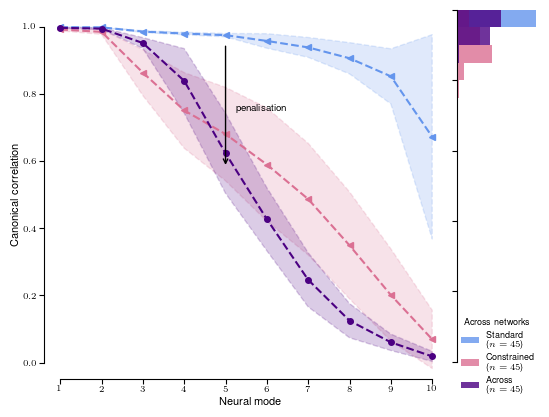

In [11]:
allDFs_rnn1 = get_full_rnn_data(seeds1, sim_number = sim1)
allDFs_rnn2 = get_full_rnn_data(seeds2, sim_number = sim2)

fig=plt.figure(dpi=100)
gs = fig.add_gridspec(nrows=1, ncols=2, width_ratios=(5,1), wspace=0)

ax = fig.add_subplot(gs[0])
ax_ = fig.add_subplot(gs[1])

plot_rnn_cca(ax, ax_, allDFs_rnn1, allDFs_rnn2)

fig.savefig(FIGPATH / 'RNN-cca.pdf', bbox_inches='tight')